Avacado Dataset Summary:

Avacado is a fruit consumed by people heavily in United states. 

Content
This data was downloaded from the Hass Avocado Board website in May of 2018 & compiled into a single CSV. 
Here's how the Hass Avocado Board describes the data on their website:

The table below represents weekly 2018 retail scan data for National retail volume (units) and price. 
Retail scan data comes directly from retailers’ cash registers based on actual retail sales of Hass avocados. 
Starting in 2013, the table below reflects an expanded, multi-outlet retail data set. 
Multi-outlet reporting includes an aggregation of the following channels: grocery, mass, club, drug, dollar and military. 
The Average Price (of avocados) in the table reflects a per unit (per avocado) cost, even when multiple units (avocados)
are sold in bags. The Product Lookup codes (PLU’s) in the table are only for Hass avocados. Other varieties of avocados
(e.g. greenskins) are not included in this table.

Some relevant columns in the dataset:

Date - The date of the observation
AveragePrice - the average price of a single avocado
type - conventional or organic
year - the year
Region - the city or region of the observation
Total Volume - Total number of avocados sold
4046 - Total number of avocados with PLU 4046 sold
4225 - Total number of avocados with PLU 4225 sold
4770 - Total number of avocados with PLU 4770 sold

Inspiration /Label 
The dataset can be seen in two angles to find the city or region and find the average price.
Task: Classification /Regression

So here we will predict the Avocados Average Price based on different features, so we will go for Regression technique.

In [1]:
#Importing all basic required libray
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# 1-Data Exploration

In [2]:
#lets import the avocado data and print them
avocado_init=pd.read_csv('avocado.csv')
print(avocado_init.shape)

print(avocado_init.head(10))

(1517, 14)
   Sl No        Date  AveragePrice  Total Volume     4046       4225    4770  \
0      0  27-12-2015          1.33      64236.62  1036.74   54454.85   48.16   
1      1  20-12-2015          1.35      54876.98   674.28   44638.81   58.33   
2      2  13-12-2015          0.93     118220.22   794.70  109149.67  130.50   
3      3  06-12-2015          1.08      78992.15  1132.00   71976.41   72.58   
4      4  29-11-2015          1.28      51039.60   941.48   43838.39   75.78   
5      5  22-11-2015          1.26      55979.78  1184.27   48067.99   43.61   
6      6  15-11-2015          0.99      83453.76  1368.92   73672.72   93.26   
7      7  08-11-2015          0.98     109428.33   703.75  101815.36   80.00   
8      8  01-11-2015          1.02      99811.42  1022.15   87315.57   85.34   
9      9  25-10-2015          1.07      74338.76   842.40   64757.44  113.00   

   Total Bags  Small Bags  Large Bags  XLarge Bags          type  year  region  
0     8696.87     8603.62  

In [3]:
#describing the data
avocado_init.describe()

,Sl No,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,1517.000000,1517.000000,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1517.000000,1517.000000
mean,26.995386,1.074990,1.601879e+06,6.464387e+05,6.114375e+05,5.040550e+04,2.935974e+05,2.487736e+05,4.264205e+04,2181.771074,2015.162821
std,14.848287,0.188891,4.433143e+06,1.947614e+06,1.672906e+06,1.377812e+05,7.579765e+05,6.474765e+05,1.182157e+05,7455.712144,0.369324
min,0.000000,0.490000,3.875074e+04,4.677200e+02,1.783770e+03,0.000000e+00,3.311770e+03,3.311770e+03,0.000000e+00,0.000000,2015.000000
25%,14.000000,0.980000,1.474700e+05,2.040034e+04,4.147606e+04,9.112500e+02,3.620689e+04,2.972722e+04,5.407400e+02,0.000000,2015.000000
50%,29.000000,1.080000,4.027919e+05,8.175117e+04,1.186649e+05,7.688170e+03,7.397906e+04,6.237569e+04,5.044350e+03,0.000000,2015.000000
75%,39.000000,1.190000,9.819751e+05,3.775785e+05,4.851503e+05,2.916730e+04,1.576097e+05,1.461994e+05,2.926767e+04,401.480000,2015.000000
max,51.000000,1.680000,4.465546e+07,1.893304e+07,1.895648e+07,1.381516e+06,6.736304e+06,5.893642e+06,1.121076e+06,108072.790000,2016.000000


In [4]:
#checking the information of the data
avocado_init.info()

#so by looking the information, here there are no missing data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1517 entries, 0 to 1516
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sl No         1517 non-null   int64  
 1   Date          1517 non-null   object 
 2   AveragePrice  1517 non-null   float64
 3   Total Volume  1517 non-null   float64
 4   4046          1517 non-null   float64
 5   4225          1517 non-null   float64
 6   4770          1517 non-null   float64
 7   Total Bags    1517 non-null   float64
 8   Small Bags    1517 non-null   float64
 9   Large Bags    1517 non-null   float64
 10  XLarge Bags   1517 non-null   float64
 11  type          1517 non-null   object 
 12  year          1517 non-null   int64  
 13  region        1517 non-null   object 
dtypes: float64(9), int64(2), object(3)
memory usage: 166.0+ KB


# 2-Exploratory Data Analysis (Cleaning, Data Exploring & Visualizing)

In [5]:
#lets again see the data
avocado_init.head(10)

,Sl No,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
5,5,22-11-2015,1.26,55979.78,1184.27,48067.99,43.61,6683.91,6556.47,127.44,0.0,conventional,2015,Albany
6,6,15-11-2015,0.99,83453.76,1368.92,73672.72,93.26,8318.86,8196.81,122.05,0.0,conventional,2015,Albany
7,7,08-11-2015,0.98,109428.33,703.75,101815.36,80.00,6829.22,6266.85,562.37,0.0,conventional,2015,Albany
8,8,01-11-2015,1.02,99811.42,1022.15,87315.57,85.34,11388.36,11104.53,283.83,0.0,conventional,2015,Albany
9,9,25-10-2015,1.07,74338.76,842.40,64757.44,113.00,8625.92,8061.47,564.45,0.0,conventional,2015,Albany


In [6]:
#so here we saw there is a attribute named "Unnamed:0" which is not required, lets drop this column from our dataset
avocado=avocado_init.drop(columns=['Sl No'])
print(avocado.head(5))
print(avocado.shape)

         Date  AveragePrice  Total Volume     4046       4225    4770  \
0  27-12-2015          1.33      64236.62  1036.74   54454.85   48.16   
1  20-12-2015          1.35      54876.98   674.28   44638.81   58.33   
2  13-12-2015          0.93     118220.22   794.70  109149.67  130.50   
3  06-12-2015          1.08      78992.15  1132.00   71976.41   72.58   
4  29-11-2015          1.28      51039.60   941.48   43838.39   75.78   

   Total Bags  Small Bags  Large Bags  XLarge Bags          type  year  region  
0     8696.87     8603.62       93.25          0.0  conventional  2015  Albany  
1     9505.56     9408.07       97.49          0.0  conventional  2015  Albany  
2     8145.35     8042.21      103.14          0.0  conventional  2015  Albany  
3     5811.16     5677.40      133.76          0.0  conventional  2015  Albany  
4     6183.95     5986.26      197.69          0.0  conventional  2015  Albany  
(1517, 13)


In [7]:
#lets print all the columns
avocado.columns

Index(['Date', 'AveragePrice', 'Total Volume', '4046', '4225', '4770',
       'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year',
       'region'],
      dtype='object')

In [8]:
# Checking the skewness of the dataset
avocado.skew()

# so here there are few variable where the skewness is more than 0.55, so we have to treat them.
# the variables are R, H, CG, SHO, SV, and E

AveragePrice   -0.109444
Total Volume    6.200138
4046            6.051830
4225            6.394926
4770            5.405164
Total Bags      5.366378
Small Bags      5.355185
Large Bags      5.144495
XLarge Bags     5.775077
year            1.828332
dtype: float64

In [9]:
# treating the skewness using log
skewattb=('AveragePrice','Total Volume','4046','4225','4770','Total Bags','Small Bags','Large Bags','XLarge Bags')
for col in skewattb:
    if avocado.skew().loc[col]>0.55:
        avocado[col]=np.log1p(avocado[col])

In [10]:
# Again checking the skewness of the dataset
avocado.skew()

AveragePrice   -0.109444
Total Volume    0.667468
4046           -0.160268
4225            0.184436
4770           -0.355508
Total Bags      0.695502
Small Bags      0.713843
Large Bags     -0.912766
XLarge Bags     0.783913
year            1.828332
dtype: float64

In [11]:
#lets check the attribute data types
avocado.dtypes

Date             object
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year              int64
region           object
dtype: object

In [12]:
#now lets convert the date attribute to date format as it is objevt type
avocado['Date']=pd.to_datetime(avocado['Date'])
avocado['Date'].sample(5)

883    2015-01-03
501    2015-01-11
1454   2016-11-27
665    2015-12-07
300    2015-03-29
Name: Date, dtype: datetime64[ns]

In [13]:
#now lets convert the type attribute to numeric format as it is object format
#avocado['type'].describe()
avocado['type'].nunique()

#so by looking this, we observed that all the avocado'd are conventional type, 
#so we can drop this column for our model building, as this is not going to impact, 
#if the type was more than one, then we can consoder this to our model building.

1

In [14]:
#so lets drop this attribute from our dataset
avocado=avocado.drop(columns=['type'])
print(avocado.head(6))

        Date  AveragePrice  Total Volume      4046       4225      4770  \
0 2015-12-27          1.33     11.070344  6.944801  10.905146  3.895080   
1 2015-12-20          1.35     10.912867  6.515127  10.706381  4.083115   
2 2015-12-13          0.93     11.680313  6.679222  11.600485  4.879007   
3 2015-06-12          1.08     11.277116  7.032624  11.184108  4.298373   
4 2015-11-29          1.28     10.840377  6.848515  10.688288  4.340944   
5 2015-11-22          1.26     10.932764  7.077726  10.780393  3.797958   

   Total Bags  Small Bags  Large Bags  XLarge Bags  year  region  
0    9.070833    9.060055    4.545951          0.0  2015  Albany  
1    9.159737    9.149429    4.589955          0.0  2015  Albany  
2    9.005325    8.992584    4.645736          0.0  2015  Albany  
3    8.667708    8.644425    4.903495          0.0  2015  Albany  
4    8.729874    8.697389    5.291746          0.0  2015  Albany  
5    8.807608    8.788360    4.855462          0.0  2015  Albany  


In [15]:
#now lets convert the region attribute to numeric format as it is object format
avocado['region'].describe()
#avocado['region'].nunique()

#so here we saw that there are 51 unique region, so we can convert them to numeric using label encoder 

count           1517
unique            51
top       California
freq              76
Name: region, dtype: object

In [16]:
#similarly lets use level encoder to convert it into numeric data
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
avocado['region']=le.fit_transform(avocado['region'])
avocado.tail(15)

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,region
1502,2016-12-25,1.25,11.956290,10.494784,10.835523,8.899136,11.027627,10.844450,9.233469,4.254761,2016,7
1503,2016-12-18,1.24,11.881969,10.484666,10.742414,8.980132,10.908774,10.705614,9.215254,0.000000,2016,7
1504,2016-11-12,1.33,11.890101,10.686152,10.620648,9.070796,10.866728,10.742770,8.717744,0.000000,2016,7
1505,2016-04-12,1.34,11.949526,10.577014,10.742614,9.154085,10.998495,10.779326,9.373086,0.000000,2016,7
1506,2016-11-27,1.54,11.786419,10.570727,10.444273,9.019910,10.817129,10.692088,8.676316,0.000000,2016,7
1507,2016-11-20,1.57,11.817532,10.692983,10.271890,9.540654,10.794336,10.662484,8.703223,0.000000,2016,7
1508,2016-11-13,1.64,11.878194,10.807714,10.188606,10.030811,10.722797,10.556796,8.845326,0.000000,2016,7
1509,2016-06-11,1.57,11.864265,10.514387,10.222026,10.138831,10.867596,10.733407,8.792900,0.000000,2016,7
1510,2016-10-30,1.58,11.870296,10.580948,10.288182,10.199220,10.764615,10.603106,8.827258,5.485958,2016,7
1511,2016-10-23,1.52,12.030184,10.914778,10.590385,9.917948,10.872755,10.759210,8.641142,0.000000,2016,7


In [17]:
avocado['region'].nunique()

51

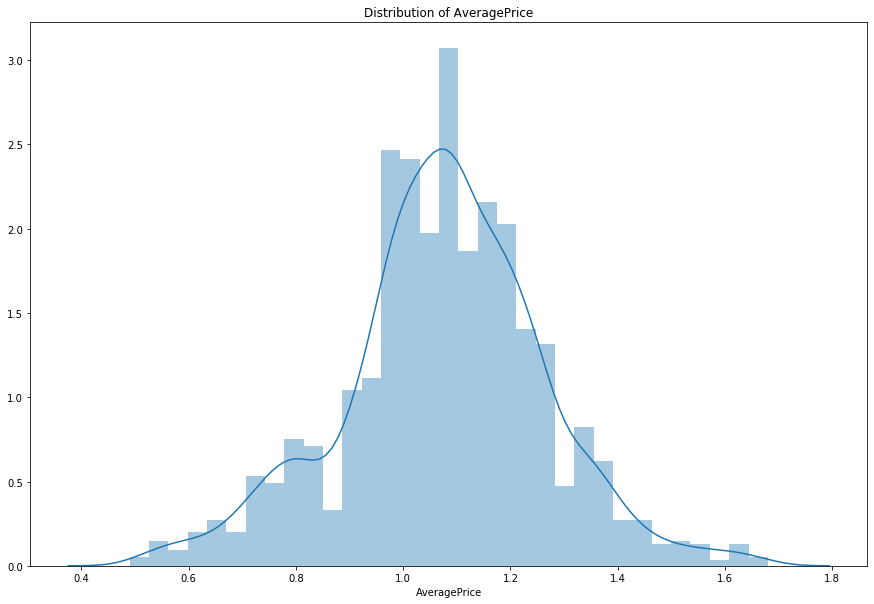

In [18]:
# now lets see the distribution of "AveragePrice"
plt.figure(figsize=(15,10))
plt.title('Distribution of AveragePrice')
sns.distplot(avocado['AveragePrice'])

Text(0.5, 1.0, 'Average Price changes wrt Date')

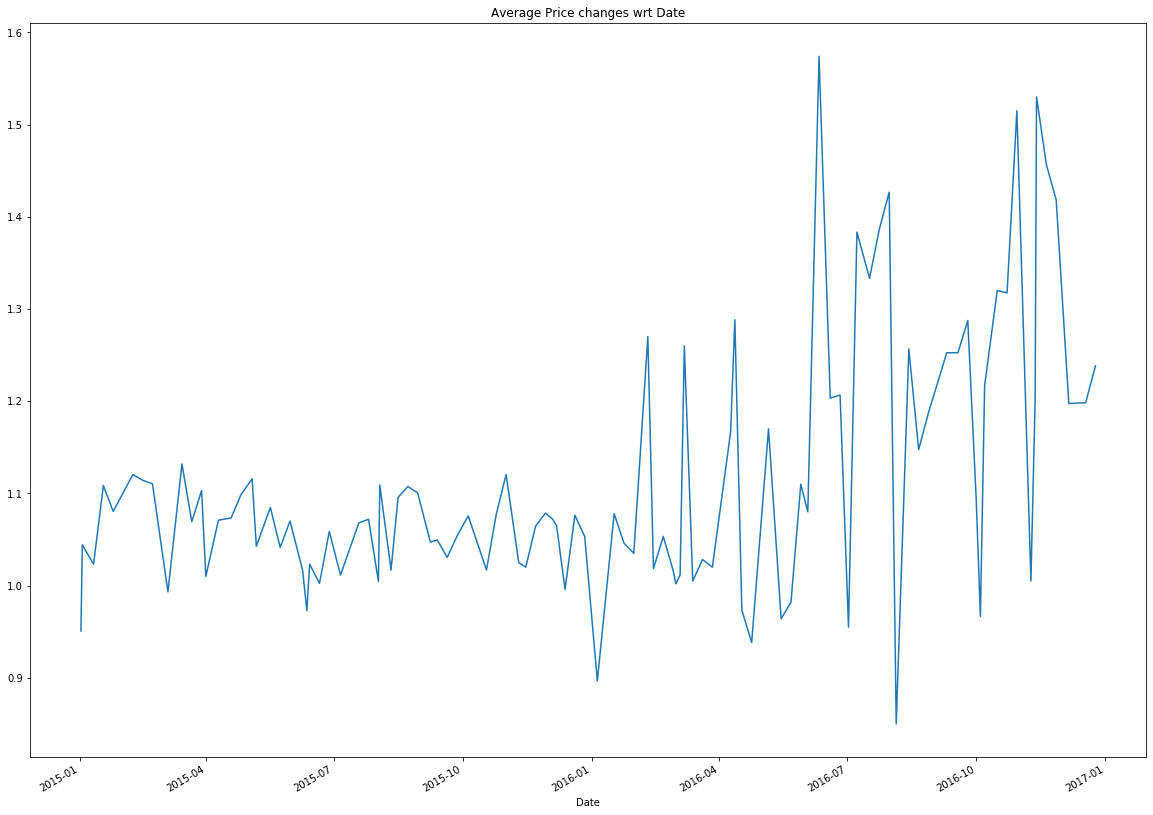

In [19]:
# now lets see the distribution of "AveragePrice" changes wrt date
bydate=avocado.groupby('Date').mean()
plt.figure(figsize=(20,15))
bydate['AveragePrice'].plot()
plt.title('Average Price changes wrt Date')

#so by looking this plot we can say that the avocado average price is increasing as the year increases.

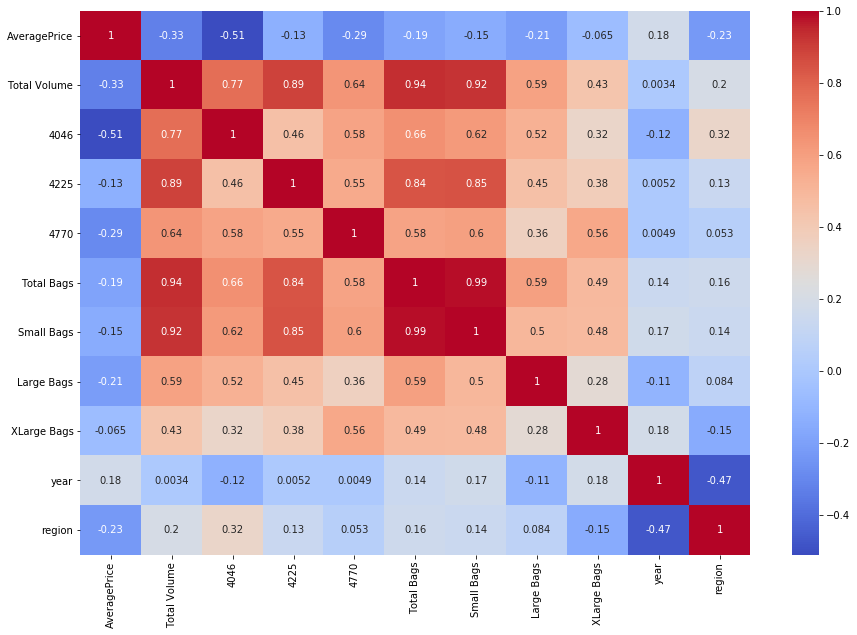

In [20]:
#lets see the corelation among data wrt AveragePrice
plt.figure(figsize=(15,10))
sns.heatmap(avocado.corr(),cmap='coolwarm',annot=True)

In [21]:
#so as Date attribute is not required for building the model, lets drop them from data set
avocado=avocado.drop(columns=['Date'])
print(avocado.head(6))

   AveragePrice  Total Volume      4046       4225      4770  Total Bags  \
0          1.33     11.070344  6.944801  10.905146  3.895080    9.070833   
1          1.35     10.912867  6.515127  10.706381  4.083115    9.159737   
2          0.93     11.680313  6.679222  11.600485  4.879007    9.005325   
3          1.08     11.277116  7.032624  11.184108  4.298373    8.667708   
4          1.28     10.840377  6.848515  10.688288  4.340944    8.729874   
5          1.26     10.932764  7.077726  10.780393  3.797958    8.807608   

   Small Bags  Large Bags  XLarge Bags  year  region  
0    9.060055    4.545951          0.0  2015       0  
1    9.149429    4.589955          0.0  2015       0  
2    8.992584    4.645736          0.0  2015       0  
3    8.644425    4.903495          0.0  2015       0  
4    8.697389    5.291746          0.0  2015       0  
5    8.788360    4.855462          0.0  2015       0  


AveragePrice       AxesSubplot(0.125,0.125;0.0596154x0.755)
Total Volume    AxesSubplot(0.196538,0.125;0.0596154x0.755)
4046            AxesSubplot(0.268077,0.125;0.0596154x0.755)
4225            AxesSubplot(0.339615,0.125;0.0596154x0.755)
4770            AxesSubplot(0.411154,0.125;0.0596154x0.755)
Total Bags      AxesSubplot(0.482692,0.125;0.0596154x0.755)
Small Bags      AxesSubplot(0.554231,0.125;0.0596154x0.755)
Large Bags      AxesSubplot(0.625769,0.125;0.0596154x0.755)
XLarge Bags     AxesSubplot(0.697308,0.125;0.0596154x0.755)
year            AxesSubplot(0.768846,0.125;0.0596154x0.755)
region          AxesSubplot(0.840385,0.125;0.0596154x0.755)
dtype: object

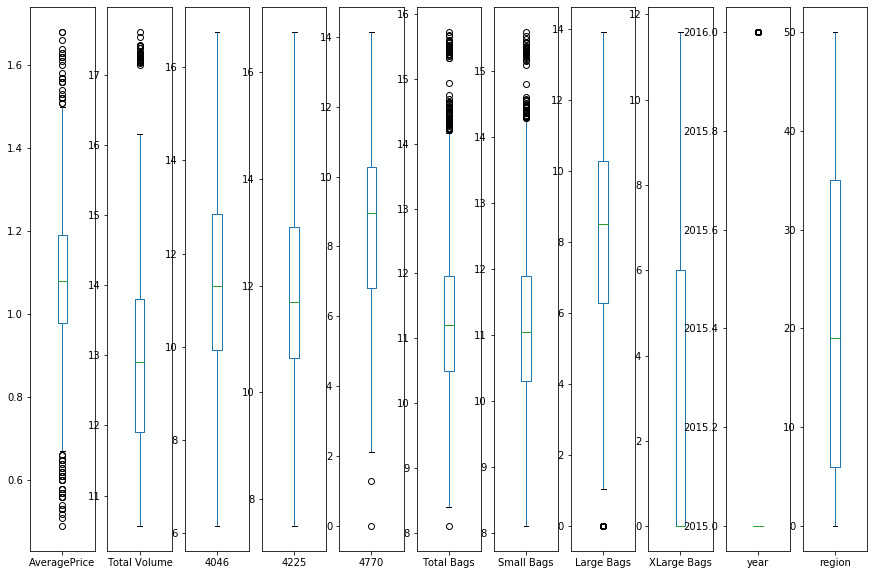

In [22]:
#checking the outliers with box plot
avocado.plot(kind='box',subplots=True, figsize=(15,10))

In [23]:
#so here we saw there are few outliers present in the dataset, so lets remove them using z score
from scipy.stats import zscore
print(avocado.shape)
z_score=abs(zscore(avocado))
print('Z Score is:','\n',z_score)
avocado_final=avocado.loc[(z_score<3).all(axis=1)]
print(avocado_final.shape)
print(avocado_final.head(5))

(1517, 11)
Z Score is: 
 [[1.35048079 1.35676174 1.82816171 ... 0.81077519 0.44100815 1.3143384 ]
 [1.45639674 1.46638736 2.01206913 ... 0.81077519 0.44100815 1.3143384 ]
 [0.76783831 0.9321394  1.94183376 ... 0.81077519 0.44100815 1.3143384 ]
 ...
 [2.14485045 0.64565294 0.20190426 ... 1.10389091 2.26753179 0.88028586]
 [2.09189247 0.60503087 0.13577946 ... 0.81077519 2.26753179 0.88028586]
 [1.88006056 0.62805557 0.23299293 ... 0.81077519 2.26753179 0.88028586]]
(1502, 11)
   AveragePrice  Total Volume      4046       4225      4770  Total Bags  \
0          1.33     11.070344  6.944801  10.905146  3.895080    9.070833   
1          1.35     10.912867  6.515127  10.706381  4.083115    9.159737   
2          0.93     11.680313  6.679222  11.600485  4.879007    9.005325   
3          1.08     11.277116  7.032624  11.184108  4.298373    8.667708   
4          1.28     10.840377  6.848515  10.688288  4.340944    8.729874   

   Small Bags  Large Bags  XLarge Bags  year  region  
0    9.0

In [24]:
# separating the input and output/target variables
df_x=avocado_final.drop(columns=['AveragePrice'])
y=avocado_final[['AveragePrice']]

print(df_x.shape)
print(y.shape)

(1502, 10)
(1502, 1)


In [25]:
df_x.skew()

Total Volume    0.592040
4046           -0.203940
4225            0.122951
4770           -0.371693
Total Bags      0.621617
Small Bags      0.643635
Large Bags     -0.934829
XLarge Bags     0.796336
year            1.838704
region          0.294168
dtype: float64

In [41]:
#scaling the input variables
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(df_x)
x=pd.DataFrame(x,columns=df_x.columns)

In [27]:
# Again checking the skewness of the dataset
x.skew()

Total Volume    0.592040
4046           -0.203940
4225            0.122951
4770           -0.371693
Total Bags      0.621617
Small Bags      0.643635
Large Bags     -0.934829
XLarge Bags     0.796336
year            1.838704
region          0.294168
dtype: float64

# 3-Building Different Model and Finding the Best Model

In [42]:
#lets print the shape of both input and target dataset
print(x.shape)
print(y.shape)

(1502, 10)
(1502, 1)


In [29]:
#defining the models which will be used for model building
from sklearn.linear_model import LinearRegression
lreg=LinearRegression()
from sklearn.neighbors import KNeighborsRegressor
knn=KNeighborsRegressor()
from sklearn.linear_model import Lasso
lsreg=Lasso()
from sklearn.linear_model import Ridge
lrreg=Ridge()
from sklearn.ensemble import GradientBoostingRegressor
gbr=GradientBoostingRegressor()
from sklearn.ensemble import AdaBoostRegressor
ada=AdaBoostRegressor()
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()

In [30]:
#appending all the models
models=[]
models.append(('LinearRegression',lreg))
models.append(('KNeighborsRegressor',knn))
models.append(('Lasso',lsreg))
models.append(('Ridge',lrreg))
models.append(('GradientBoostingRegressor',gbr))
models.append(('AdaBoostRegressor',ada))
models.append(('RandomForestRegressor',rf))

In [31]:
#printing the output of each model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
Model=[]
RState=[]
score=[]
for name, model in models:
    print('************************',name,'**********************')
    print('\n')
    Model.append(name)
    max_r2_score=0.0
    for r_state in range(42,101):
        x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=r_state)
        model.fit(x_train,y_train)
        y_pred=model.predict(x_test)
        r2_scr=r2_score(y_test,y_pred)
        if r2_scr>max_r2_score:
            max_r2_score=r2_scr
            final_r_state=r_state
    print('Final Random State is:', final_r_state)
    print('\n')
    RState.append(final_r_state*1)
    print('R2 Score is:', max_r2_score)
    print('\n')
    score.append(max_r2_score*100)
    print('\n')

************************ LinearRegression **********************


Final Random State is: 96


R2 Score is: 0.45823128785362544




************************ KNeighborsRegressor **********************


Final Random State is: 94


R2 Score is: 0.8170242670394897




************************ Lasso **********************


Final Random State is: 94


R2 Score is: 0.0




************************ Ridge **********************


Final Random State is: 96


R2 Score is: 0.4582763768345406




************************ GradientBoostingRegressor **********************


Final Random State is: 50


R2 Score is: 0.7840730367594143




************************ AdaBoostRegressor **********************


Final Random State is: 42


R2 Score is: 0.6659804759218617




************************ RandomForestRegressor **********************


Final Random State is: 95


R2 Score is: 0.8578759466043697






In [32]:
#lets print the final result of all the models
result=pd.DataFrame({'Model':Model,'Random_State':RState,'R2_Score':score})
print(result)

                       Model  Random_State   R2_Score
0           LinearRegression            96  45.823129
1        KNeighborsRegressor            94  81.702427
2                      Lasso            94   0.000000
3                      Ridge            96  45.827638
4  GradientBoostingRegressor            50  78.407304
5          AdaBoostRegressor            42  66.598048
6      RandomForestRegressor            95  85.787595


In [33]:
# So here RandomForestRegressor is the best model, so lets find out the best parameter for this to get maximum score
#lets use grid search method to find optimal value 

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
rfreg=RandomForestRegressor()
parameters={'n_estimators':[int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]}
clf=GridSearchCV(rfreg, parameters, cv=5)
clf.fit(x,y)
clf.best_params_

{'n_estimators': 200}

In [47]:
# So lets build the final model with n_estimators=200 and random_state=95

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)
rfreg=RandomForestRegressor(n_estimators=200,random_state=95)
rfreg.fit(x_train,y_train)
y_pred=rfreg.predict(x_test)
print('R2 score is:',r2_score(y_test,y_pred))
print('RMSE is:',np.sqrt(mean_squared_error(y_test,y_pred)))

R2 score is: 0.8344635043059786
RMSE is: 0.08518319524701864


In [48]:
#checking the mean r2 score and overfitting and underfitting using cross validation
from sklearn.model_selection import cross_val_score
print('Mean R2 score of RandomForestRegressor is:', cross_val_score(rfreg,x,y,cv=5,scoring='r2').mean())
print('Standard Deviation of RandomForestRegressor is:',cross_val_score(rfreg,x,y,cv=5,scoring='r2').std())

Mean R2 score of RandomForestRegressor is: 0.15494560207960134
Standard Deviation of RandomForestRegressor is: 0.2769130611583224


In [49]:
#lets predict the Avarage Price value
print('Actual Avarage Price:\n',y_test)
print('Predicted Avarage Price:\n',y_pred)

#So by looking this we can conclude that our model is predicting around 86% of correct results 
#for predicting the Avarage Price of Avocado.

Actual Avarage Price:
       AveragePrice
708           1.19
100           1.19
886           1.14
864           1.08
1355          0.89
...            ...
348           1.17
273           0.94
421           1.21
1104          1.10
31            1.19

[301 rows x 1 columns]
Predicted Avarage Price:
 [1.11755 1.17635 1.14395 1.0582  0.92365 1.20315 1.0453  1.23475 0.98375
 1.1207  1.247   1.11275 1.04825 0.98235 1.0456  1.3798  1.01095 1.35355
 0.7802  1.20165 1.2197  1.21685 0.9315  0.9957  1.3424  1.26745 1.37645
 1.01585 0.8854  0.8995  0.89665 1.03785 0.82845 1.2374  0.7666  0.60295
 1.14425 0.8955  0.9898  0.83645 0.56345 1.25235 1.1525  1.363   1.28995
 1.0123  1.0186  0.9685  1.23265 0.8012  0.78315 1.10525 1.13365 1.03115
 1.07315 1.0942  1.07525 1.02395 1.2121  0.77905 1.0832  0.9597  1.1422
 0.9637  0.9781  1.03675 1.09845 0.9964  1.2211  1.10775 1.1428  1.0788
 1.1117  1.1652  1.14985 1.00435 1.24255 0.9314  1.07685 0.9162  1.084
 1.2064  1.0223  1.12415 1.2295  1.1216  1.171

In [50]:
#saving the final model
from sklearn.externals import joblib
#save the model as joblib in a file
joblib.dump(rfreg,'rfreg_averageprice.obj')

['rfreg_averageprice.obj']

In [51]:
# load the model from the file
AvaragePrice_from_joblib=joblib.load('rfreg_averageprice.obj')

In [52]:
#Use the loaded model to make predictions against test data
AvaragePrice_from_joblib.predict(x_test)

array([1.11755, 1.17635, 1.14395, 1.0582 , 0.92365, 1.20315, 1.0453 ,
       1.23475, 0.98375, 1.1207 , 1.247  , 1.11275, 1.04825, 0.98235,
       1.0456 , 1.3798 , 1.01095, 1.35355, 0.7802 , 1.20165, 1.2197 ,
       1.21685, 0.9315 , 0.9957 , 1.3424 , 1.26745, 1.37645, 1.01585,
       0.8854 , 0.8995 , 0.89665, 1.03785, 0.82845, 1.2374 , 0.7666 ,
       0.60295, 1.14425, 0.8955 , 0.9898 , 0.83645, 0.56345, 1.25235,
       1.1525 , 1.363  , 1.28995, 1.0123 , 1.0186 , 0.9685 , 1.23265,
       0.8012 , 0.78315, 1.10525, 1.13365, 1.03115, 1.07315, 1.0942 ,
       1.07525, 1.02395, 1.2121 , 0.77905, 1.0832 , 0.9597 , 1.1422 ,
       0.9637 , 0.9781 , 1.03675, 1.09845, 0.9964 , 1.2211 , 1.10775,
       1.1428 , 1.0788 , 1.1117 , 1.1652 , 1.14985, 1.00435, 1.24255,
       0.9314 , 1.07685, 0.9162 , 1.084  , 1.2064 , 1.0223 , 1.12415,
       1.2295 , 1.1216 , 1.1713 , 1.2807 , 1.0495 , 1.0287 , 1.0999 ,
       1.0955 , 1.0869 , 1.02245, 1.2265 , 1.0239 , 0.7424 , 0.9946 ,
       1.0872 , 1.00

# Conclusion:

So here 'RandomForestRegressor Model' is the best model out of all model tested above and by looking this we can conclude
that our model is predicting around 85% of correct results for predicting the Average Price of Avocado.